In [37]:
using Revise
using SSM
using Distributions
using ForwardDiff
using LinearAlgebra
using Random
using StatsFuns
using SpecialFunctions
using Test

include("../../helper_functions.jl")
include("../HiddenMarkovModels.jl")

test_HiddenMarkovModel_E_step (generic function with 1 method)

## Create a Simulation

In [38]:
# create a Gaussian true_model
#Random.seed!(123)

n = 1000
output_dim = 2
order = 1

# make a rotation matrix for pi/20 radians
θ = π/20
β = [1 0; cos(θ) -sin(θ); sin(θ) cos(θ)] * 0.9
Σ = 0.01 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = AutoRegression(order=order, output_dim=output_dim, β=β, Σ=Σ)

# make a rotation matrix for -pi/10 radians
θ = -π/10
β = [0 1; cos(θ) -sin(θ); sin(θ) cos(θ)] * 0.9
Σ = 0.01 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = AutoRegression(order=order, output_dim=output_dim, β=β, Σ=Σ)

# make the HMM
true_model = HiddenMarkovModel(K=2, B=[emission_1, emission_2])
true_model.πₖ = [1.0, 0]
true_model.A = [0.97 0.03; 0.03 0.97]

Y_prev = reshape([1.0, 0.0], 1, :)

# sample data
states, Y = SSM.sample(true_model, Y_prev, n=n)

([1, 2, 2, 2, 2, 2, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 1, 1, 1, 1, 1], [1.8551804556381608 -0.26098966444228194; 1.6657698562918923 1.3255354782412112; … ; 2.472577628107393 1.0480839986321215; 3.0824232426857936 0.5988183447585884])

## Fit a model

In [39]:
est_model = HiddenMarkovModel(K=2, emission=AutoRegression(output_dim=output_dim, order=1))
weighted_initialization(est_model, Y_prev, Y)
est_model.πₖ = [1, 0]
fit!(est_model, Y_prev, Y)

iter 1 loglikelihood: -2869.2669246495934
iter 2 loglikelihood: -2677.609366437744
iter 3 loglikelihood: -2089.8666333519177
iter 4 loglikelihood: -1474.1640374777016
iter 5 loglikelihood: -1359.5277187789886
iter 6 loglikelihood: -1330.1470739337014
iter 7 loglikelihood: -1296.034086835026
iter 8 loglikelihood: -1275.7417826532562
iter 9 loglikelihood: -1260.5429707471721
iter 10 loglikelihood: -1197.6364531203678
iter 11 loglikelihood: -1135.1381282216357
iter 12 loglikelihood: -1002.2909779539392
iter 13 loglikelihood: -520.9117760805116
iter 14 loglikelihood: 387.28295156810265
iter 15 loglikelihood: 290.15247489673465
iter 16 loglikelihood: 290.15247489167865


## Check results

In [40]:
print_models(true_model, est_model, Y_prev, Y)


True Model:
true_model: HiddenMarkovModel([0.97 0.03; 0.03 0.97], EmissionModel[SSM.AutoRegressionEmission(AutoRegression(2, 1, GaussianRegression(2, 2, [0.9 0.0; 0.888919506535624 -0.1407910185362078; 0.1407910185362078 0.888919506535624], [0.01 0.0; 0.0 0.01], true, 0.0))), SSM.AutoRegressionEmission(AutoRegression(2, 1, GaussianRegression(2, 2, [0.0 0.9; 0.8559508646656382 0.2781152949374527; -0.2781152949374527 0.8559508646656382], [0.01 0.0; 0.0 0.01], true, 0.0)))], [1.0, 0.0], 2)
loglikelihood: 701.1717181387394

Estimated Model:
est_model: HiddenMarkovModel([0.9658444022770395 0.03415559772296058; 0.036016949152542804 0.963983050847457], EmissionModel[SSM.AutoRegressionEmission(AutoRegression(2, 1, GaussianRegression(2, 2, [-0.010043406916977459 0.889911841498678; 0.8558224558495637 0.2760788937218588; -0.27877901788200304 0.8540561712266062], [0.006397294183780598 -0.001867067482174426; -0.001867067482174426 0.006897431898515787], true, 0.0))), SSM.AutoRegressionEmission(AutoR

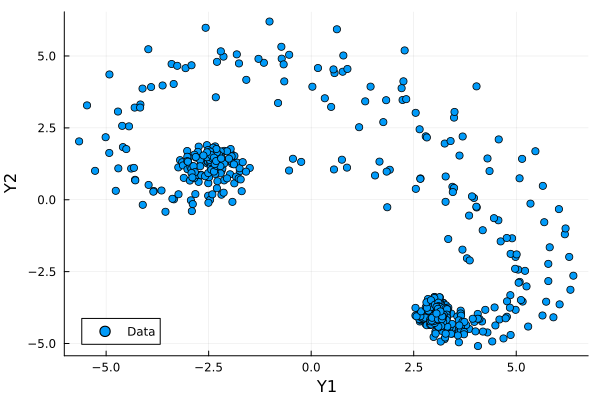

In [41]:
# plot the data
using Plots
plot(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")

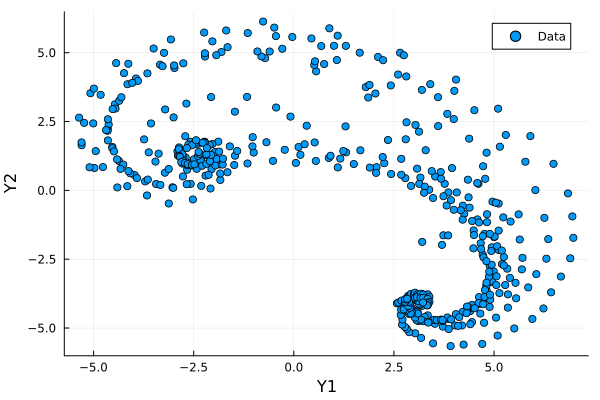

In [42]:
# sample from the est_model and plot the data

state_sequence, Y = SSM.sample(est_model, Y_prev, n=n)

# plot the data
plot(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")